# Setup

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 189 kB 42.8 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 27.7 MB/s 
     |████████████████████████████████| 56 kB 1.1 MB/s 
     |████████████████████████████████| 51 kB 308 kB/s 


In [ ]:
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *

In [4]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/')
path.ls()

(#1) [Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/01_data_collection.ipynb')]

# Loading the Data

In [6]:
cars = [
    'volkswagen t-cross',
    'nissan kicks',
    'renault duster',
    'volkswagen nivus',
    'caoa tiggo',
    'honda hr-v',
    'chrevrolet tracker',
    'jeep renegade',
    'jeep compass',
    'hyundai creta'
]

In [11]:
urls = search_images_ddg(cars[1])
len(urls), urls[0]

(242,
 'https://s1.cdn.autoevolution.com/images/news/gallery/2021-nissan-kicks-gains-e-power-hybrid-powertrain-in-thailand-it-s-still-fwd_4.jpg')

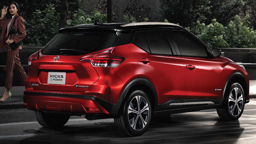

In [12]:
download_url(urls[0], path/'t-cross.jpg')
im = Image.open(path/'t-cross.jpg')
im.thumbnail((256,256))
im

In [23]:
# download and saving all the images
cars_dir = (path/'cars')

cars_dir.mkdir(exist_ok=True)
for car_type in cars:    
    folder_name = car_type.split(' ')[1]
    dest = (cars_dir/folder_name)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{car_type}')
    download_images(dest, urls=results)

In [24]:
# pega o endereço completo de cada arquivo de imagem
fns = get_image_files(cars_dir)
fns

(#2479) [Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000005.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000002.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000004.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000007.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000006.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000008.jpe'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000001.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000009.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000011.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000000.jpg')...]

In [25]:
# 776 imagens coletadas
len(fns)

2479

In [26]:
# verificando imagens corruptas
failed = verify_images(fns)
failed

(#18) [Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000010.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross/00000057.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/nivus/00000103.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/nivus/00000174.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/nivus/00000202.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/nivus/00000204.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/tiggo/00000072.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/hr-v/00000022.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/hr-v/00000147.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/hr-v/00000178.jpg')...]

In [27]:
# 5 imagens corruptas
len(failed)

18

In [28]:
# eliminando as imagens corruptas
failed.map(Path.unlink)

(#18) [None,None,None,None,None,None,None,None,None,None...]

In [30]:
# verificando se as imagens corrompidas foram realmente eliminadas
fns = get_image_files(cars_dir)
failed = verify_images(fns)
failed

(#0) []

In [31]:
len(fns)

2461

# Resumo

Foram baixadas 2479 imagens de 10 tipos de carros diferentes, da classe SUV. Dessas 2479 imagens, fizemos como primeiro passo de tratamento de dados a remoção de 18 imagens corrompidas. Logo, de 2479 temos 2461 imagens.